<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

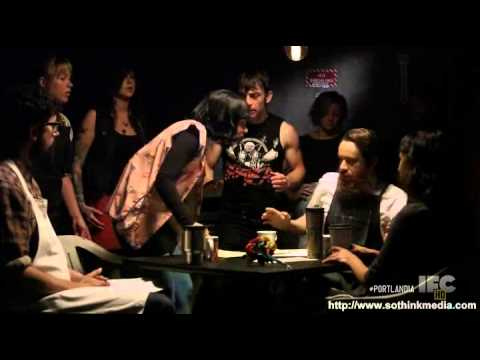

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/home/whyseman/LambdaSchool_repos/nlp_studies/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Cleaning & Organizing Data

print("Coffee Shop Names:", shops["coffee_shop_name"].value_counts())
shops["coffee_shop_name"] = shops["coffee_shop_name"].apply(lambda x: x.lower())
shops["coffee_shop_name"].value_counts()

Coffee Shop Names: Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64


epoch coffee                            400
halcyon                                 300
the factory - cafe with a soul          244
houndstooth coffee                      200
venezia italian gelato                  200
                                       ... 
lucky lab coffee                         25
sister coffee                            17
kowabunga coffee                         16
the marvelous vintage tea party co.      10
lola savannah coffee downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [5]:
print("Text Reviews:", shops["full_review_text"].value_counts())
shops["full_review_text"] = shops["full_review_text"].apply(lambda x: x.lower())
shops["full_review_text"].value_counts()

Text Reviews:  12/1/2016 So much aesthetic in this place. I love every corner of this coffee shop. The only downside is there's no wifi. Their matcha latte is to die for! See all photos from Rojean S. for The Factory - Cafe With a Soul                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

 10/19/2016 the matcha lattes are amazing! great atmosphere, great food and drink, and everything is plated beautifully. the kind of place where you can tell the employees take pride in their work. i'll definitely be back often.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              4
 10/9/2016 1 check-i

In [6]:
print("Star Reviews:", shops["star_rating"].value_counts())
shops["star_rating"] = shops["star_rating"].apply(lambda x: x.lower())
shops["star_rating"].value_counts()

Star Reviews:  5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64


 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [7]:
print(shops.shape)
shops.head()

(7616, 3)


,coffee_shop_name,full_review_text,star_rating
0,the factory - cafe with a soul,11/25/2016 1 check-in love love loved the atm...,5.0 star rating
1,the factory - cafe with a soul,"12/2/2016 listed in date night: austin, ambia...",4.0 star rating
2,the factory - cafe with a soul,11/30/2016 1 check-in listed in brunch spots ...,4.0 star rating
3,the factory - cafe with a soul,11/25/2016 very cool decor! good drinks nice ...,2.0 star rating
4,the factory - cafe with a soul,12/3/2016 1 check-in they are located within ...,4.0 star rating


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [8]:
# NLP Libraries

import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

In [9]:
# def tokenize(text):
#     """
#     Parses a string of several units into several different strings, or tokens.
    
#     Args: (str) Enter phrase to be lowercased and split into tokens.
    
#     Return: list of strings from original text.
#     """
    
#     tokens = re.sub("[^a-zA-Z 0-9]", "", text)
#     tokens = tokens.lower().split()
    
#     return tokens

In [10]:
shops["full_review_text"].value_counts(normalize=True)[:25]

 10/19/2016 the matcha lattes are amazing! great atmosphere, great food and drink, and everything is plated beautifully. the kind of place where you can tell the employees take pride in their work. i'll definitely be back often.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [11]:
# shops["review_tokens"] = shops["full_review_text"].apply(tokenize)
# shops["review_tokens"].head()

In [12]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,the factory - cafe with a soul,11/25/2016 1 check-in love love loved the atm...,5.0 star rating
1,the factory - cafe with a soul,"12/2/2016 listed in date night: austin, ambia...",4.0 star rating
2,the factory - cafe with a soul,11/30/2016 1 check-in listed in brunch spots ...,4.0 star rating
3,the factory - cafe with a soul,11/25/2016 very cool decor! good drinks nice ...,2.0 star rating
4,the factory - cafe with a soul,12/3/2016 1 check-in they are located within ...,4.0 star rating


In [13]:
# word_count = Counter()
# shops["review_tokens"].apply(lambda x: word_count.update(x))
# word_count.most_common(20)

In [14]:
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [15]:
tokens = []

for doc in tokenizer.pipe(shops["full_review_text"], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops["review_tokens"] = tokens
print(shops.shape)
shops.head()

(7616, 4)


,coffee_shop_name,full_review_text,star_rating,review_tokens
0,the factory - cafe with a soul,11/25/2016 1 check-in love love loved the atm...,5.0 star rating,"[ , 11/25/2016, 1, check-in, love, love, loved..."
1,the factory - cafe with a soul,"12/2/2016 listed in date night: austin, ambia...",4.0 star rating,"[ , 12/2/2016, listed, in, date, night:, austi..."
2,the factory - cafe with a soul,11/30/2016 1 check-in listed in brunch spots ...,4.0 star rating,"[ , 11/30/2016, 1, check-in, listed, in, brunc..."
3,the factory - cafe with a soul,11/25/2016 very cool decor! good drinks nice ...,2.0 star rating,"[ , 11/25/2016, very, cool, decor!, good, drin..."
4,the factory - cafe with a soul,12/3/2016 1 check-in they are located within ...,4.0 star rating,"[ , 12/3/2016, 1, check-in, they, are, located..."


In [16]:
STOP_WORDS = nlp.Defaults.stop_words
STOP_WORDS = nlp.Defaults.stop_words.union([" ", "coffee", "i'm", "i've", "1", "it's", "got", "place",
                                           "austin", "check-in"])

In [17]:
tokens = []

for doc in tokenizer.pipe(shops["full_review_text"], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
        
    tokens.append(doc_tokens)

shops["review_tokens"] = tokens
print(shops.shape)
shops.head()

(7616, 4)


,coffee_shop_name,full_review_text,star_rating,review_tokens
0,the factory - cafe with a soul,11/25/2016 1 check-in love love loved the atm...,5.0 star rating,"[11/25/2016, love, love, loved, atmosphere!, c..."
1,the factory - cafe with a soul,"12/2/2016 listed in date night: austin, ambia...",4.0 star rating,"[12/2/2016, listed, date, night:, austin,, amb..."
2,the factory - cafe with a soul,11/30/2016 1 check-in listed in brunch spots ...,4.0 star rating,"[11/30/2016, listed, brunch, spots, loved, ecl..."
3,the factory - cafe with a soul,11/25/2016 very cool decor! good drinks nice ...,2.0 star rating,"[11/25/2016, cool, decor!, good, drinks, nice,..."
4,the factory - cafe with a soul,12/3/2016 1 check-in they are located within ...,4.0 star rating,"[12/3/2016, located, northcross, mall, shoppin..."


In [18]:
from collections import Counter

def count(docs):
    """
    """
    
    word_count = Counter()
    appears_in = Counter()
    docs_sum = len(docs)
    
    for doc in docs:
        word_count.update(doc)
        appears_in.update(set(doc))
        
    tmp = zip(word_count.keys(), word_count.values())
    
    wc = pd.DataFrame(tmp, columns=["word", "count"])
    total = wc["count"].sum()
    wc["rank"] = wc["count"].rank(method="first", ascending=False)
    wc["pct_total"] = wc["count"].apply(lambda x: x / total)
    wc["cul_pct_total"] = wc["pct_total"].cumsum()
    wc = wc.sort_values(by="rank")
    
    tmp2 = zip(appears_in.keys(), appears_in.values())
    
    ac = pd.DataFrame(tmp2, columns=["word", "appears_in"])
    wc = ac.merge(wc, on="word")
    
    wc["appears_in_pct"] = wc["appears_in"].apply(lambda x: x / docs_sum)
    
    return wc.sort_values(by="rank")

wc = count(shops["review_tokens"])
print(wc.shape)
wc.head()

(40386, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
136,great,2438,3250,1.0,0.008688,0.091409,0.320116
157,like,2034,2902,2.0,0.007758,0.130212,0.267069
177,good,2084,2779,3.0,0.007429,0.103209,0.273634
1,love,1434,1806,4.0,0.004828,0.004881,0.188288
791,little,1230,1479,5.0,0.003954,0.334988,0.161502


In [19]:
# Import Plotting Libraries

import squarify
import matplotlib.pyplot as plt
import seaborn as sns

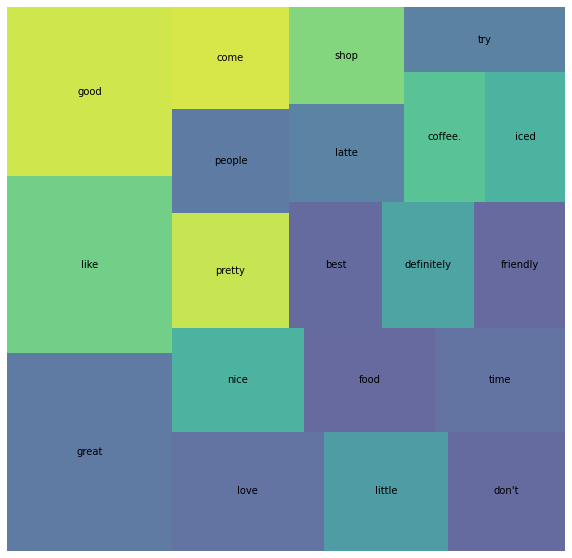

In [20]:
wc_top20 = wc[wc["rank"] <= 20]

plt.figure(figsize=(10, 10))
squarify.plot(sizes=wc_top20["pct_total"],label=wc_top20["word"], alpha=.8)
plt.axis("off")
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [21]:
shops["bad_reviews"] = shops["star_rating"].str.contains("1.0 star rating|2.0 star rating|3.0 star rating",
                                                        case=False)
shops["good_reviews"] = shops["star_rating"].str.contains("4.0 star rating|5.0 star rating", case=False)
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_tokens,bad_reviews,good_reviews
0,the factory - cafe with a soul,11/25/2016 1 check-in love love loved the atm...,5.0 star rating,"[11/25/2016, love, love, loved, atmosphere!, c...",False,True
1,the factory - cafe with a soul,"12/2/2016 listed in date night: austin, ambia...",4.0 star rating,"[12/2/2016, listed, date, night:, austin,, amb...",False,True
2,the factory - cafe with a soul,11/30/2016 1 check-in listed in brunch spots ...,4.0 star rating,"[11/30/2016, listed, brunch, spots, loved, ecl...",False,True
3,the factory - cafe with a soul,11/25/2016 very cool decor! good drinks nice ...,2.0 star rating,"[11/25/2016, cool, decor!, good, drinks, nice,...",True,False
4,the factory - cafe with a soul,12/3/2016 1 check-in they are located within ...,4.0 star rating,"[12/3/2016, located, northcross, mall, shoppin...",False,True


(34292, 7) (16324, 7)


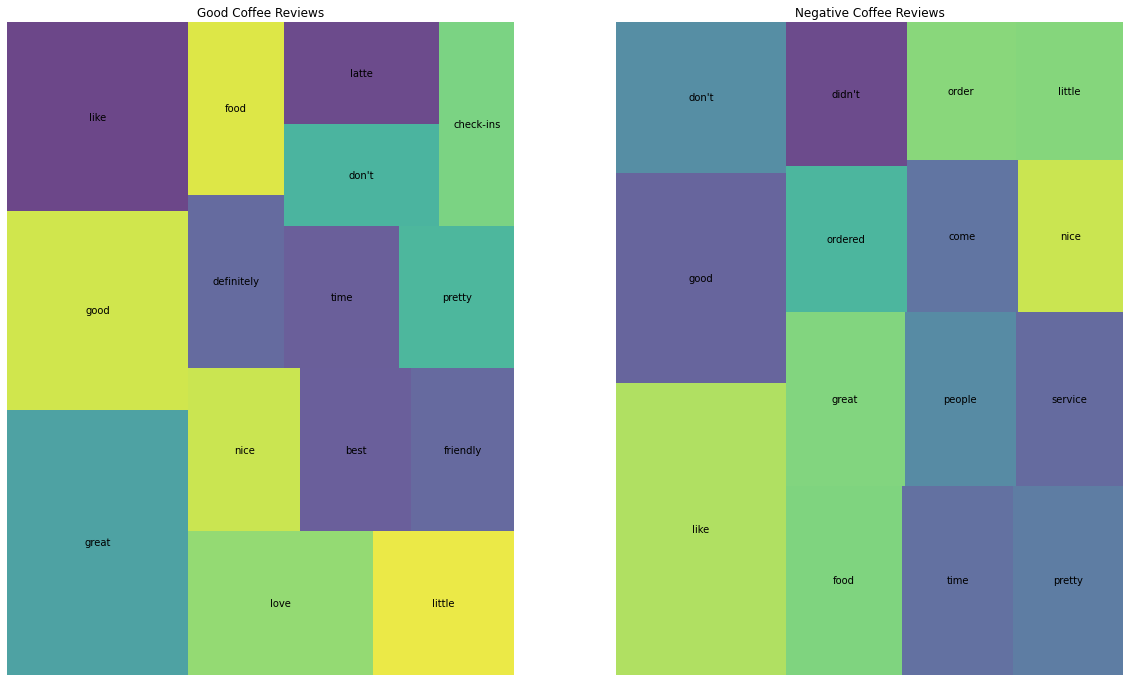

In [24]:
# Separating review tokens through classification above

good_wc = count(shops[shops["good_reviews"] == True]["review_tokens"])
nega_wc = count(shops[shops["bad_reviews"] == True]["review_tokens"])
print(good_wc.shape, nega_wc.shape)

# Extracting Top and Bottom 20 review words
top15 = good_wc[good_wc["rank"] <= 15]
bottom15 = nega_wc[nega_wc["rank"] <= 15]

# Plotting Matrices Below
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# Good Reviews
axes[0].set_title("Good Coffee Reviews")
squarify.plot(sizes=top15["pct_total"], label=top15["word"], alpha=.8, ax=axes[0])
axes[0].axis("off")

# Negative Reviews
axes[1].set_title("Negative Coffee Reviews")
squarify.plot(sizes=bottom15["pct_total"], label=bottom15["word"], alpha=.8, ax=axes[1])
axes[1].axis("off")

plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

